In [2]:
# Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')


The power system consists of 4 generators of 11 × 10^3 V, each pair located at each end of the transmission line. Transformers are present in between to simulate and study the various faults at the midpoint of the transmission line.

What are Electrical Faults?

Normally, a power system operates under balanced conditions. When the system becomes unbalanced due to the failures of insulation at any point or due to the contact of live wires, a short–circuit or fault, is said to occur in the line. Faults may occur in the power system due to the number of reasons like natural disturbances (lightning, high-speed winds, earthquakes), insulation breakdown, falling of a tree, bird shorting, etc.

Faults can be brodly categorised into two types:
1. Open-circuit Fault

2. Short-Circuit Faults

Short-Circuit Faults

1. Symmetrical

2. Asymmetrical Faults

Symmetrical and Asymmetrical Faults

Symmetrical Faults
In symmetrical faults, all phases are shorted to each other or to earth (L-L-L) or (L-L-L-G).
The nature of this type of fault is balanced.
In this type of fault,fault currents in all phases are symmetrical i.e. their magnitudes are equal and they are equally displaced by angle 120 degree.
It is more severe type of fault but it occurs rarely.

Asymmetrical Faults
These faults involve only one or two phases.
In this type of fault, three phase lines become unbalanced.
There are mainly three types namely line to ground (L-G), line to line (L-L) and double line to ground (LL-G) faults.
These type of faults mostly occur on power system..

This file contains the dataset to classify the types of fault.

Inputs - [Ia,Ib,Ic,Va,Vb,Vc]
Ia = Current in line A

Ib = Current in line B

Ic = Current in line C

Va = Voltage in line A

Vb = Voltage in line B

Vc = Voltage in line C

Examples :

[G C B A] - Outputs

[0 0 0 0] - No Fault

[1 0 0 0] - Ground Fault

[0 0 0 1] - Fault in Line A

[0 0 1 0] - Fault in Line B

[0 1 0 0] - Fault in Line C

[1 0 0 1] - LG fault (Between Phase A and Ground)

[1 0 1 0] - LG fault (Between Phase B and Ground)

[1 1 0 0] - LG fault (Between Phase C and Ground)

[0 0 1 1] - LL fault (Between Phase B and Phase A)

[0 1 1 0] - LL fault (Between Phase C and Phase B)

[0 1 0 1] - LL fault (Between Phase C and Phase A)

[1 1 0 0] - LG fault (Between Phase C and Ground)

[1 0 1 0] - LG fault (Between Phase B and Ground)

[1 0 0 1] - LG fault (Between Phase A and Ground)

[1 0 1 1] - LLG Fault (Between Phases A,B and Ground)

[1 1 0 1] - LLG Fault (Between Phases A,C and Ground)

[1 1 1 0] - LLG Fault (Between Phases C,B and Ground)

[0 1 1 1] - LLL Fault(Between all three phases)

[1 1 1 1] - LLLG fault( Three phase symmetrical fault)

In [3]:
power_df = pd.read_csv('classData.csv')
power_df.head()


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


Voltage is in Per Unit value (pu)

If there is any confusion regarding the values of the Line voltages, then let it be clarify that they are most probably in p.u. value i.e.


Vp.u.=V/Vbase

In actual the power system consists of 4 generators of 11 × 10^3 V. so we can convert by multiplying them by Volts provided they have taken 11k as their base

In [4]:
power_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [5]:
# Checking for null values 
power_df.isnull().sum()

G     0
C     0
B     0
A     0
Ia    0
Ib    0
Ic    0
Va    0
Vb    0
Vc    0
dtype: int64

In [6]:
power_df.shape

(7861, 10)

Text(0.5, 1.0, 'Ground Fault')

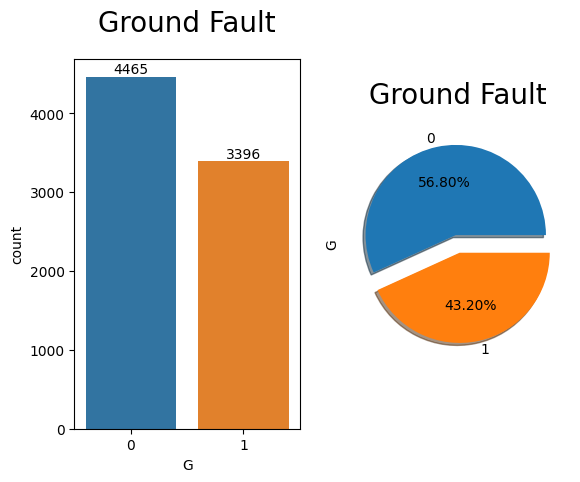

In [7]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x = 'G' , data = power_df)
ax.bar_label(ax.containers[0])
plt.title('Ground Fault' ,fontsize = 20 ,pad = 20)

ax = plt.subplot(1,2,2)
ax = power_df['G'].value_counts().plot.pie(explode = [0.1,0.1] ,
                                           autopct = '%1.2f%%' , shadow = True)
plt.title('Ground Fault' ,fontsize = 20 ,pad = 20)

Text(0.5, 1.0, 'Line A Fault')

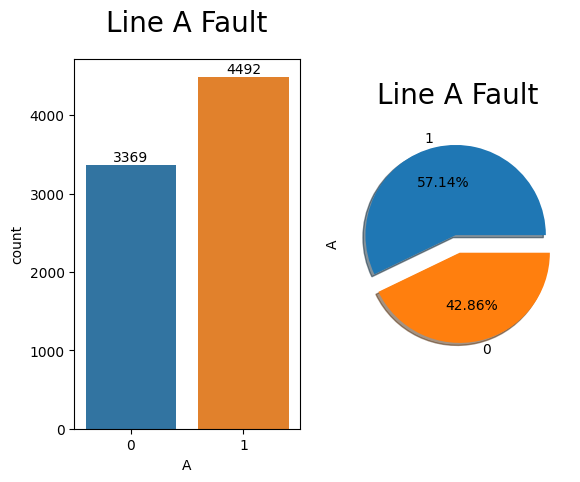

In [8]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x = 'A' , data = power_df)
ax.bar_label(ax.containers[0])
plt.title('Line A Fault' ,fontsize = 20 ,pad = 20)

ax = plt.subplot(1,2,2)
ax = power_df['A'].value_counts().plot.pie(explode = [0.1,0.1] ,
                                           autopct = '%1.2f%%' , shadow = True)
plt.title('Line A Fault' ,fontsize = 20 ,pad = 20)

Text(0.5, 1.0, 'Line B Fault')

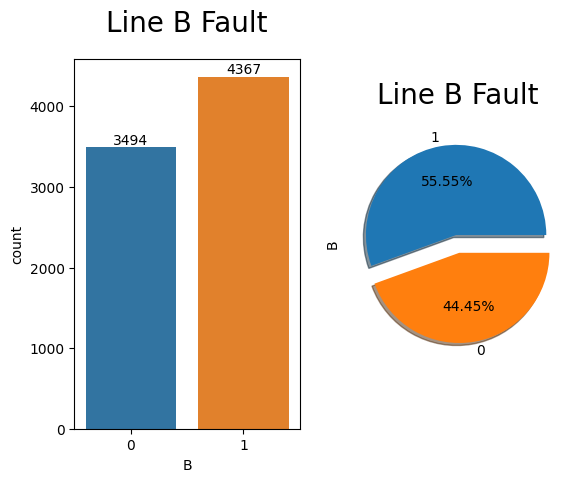

In [9]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x = 'B' , data = power_df)
ax.bar_label(ax.containers[0])
plt.title('Line B Fault' ,fontsize = 20 ,pad = 20)

ax = plt.subplot(1,2,2)
ax = power_df['B'].value_counts().plot.pie(explode = [0.1,0.1] ,
                                           autopct = '%1.2f%%' , shadow = True)
plt.title('Line B Fault' ,fontsize = 20 ,pad = 20)

Text(0.5, 1.0, 'Line C Fault')

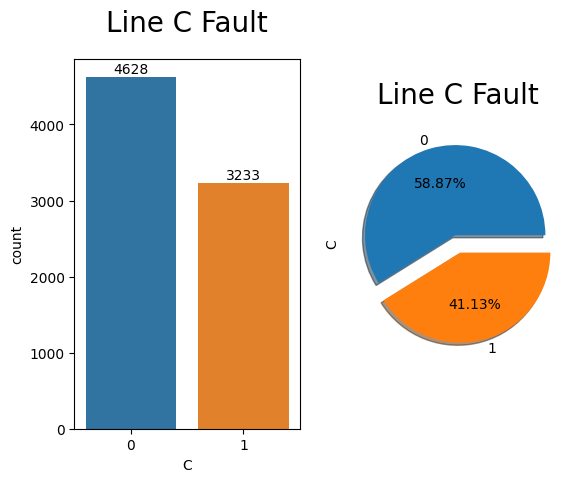

In [10]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x = 'C' , data = power_df)
ax.bar_label(ax.containers[0])
plt.title('Line C Fault' ,fontsize = 20 ,pad = 20)

ax = plt.subplot(1,2,2)
ax = power_df['C'].value_counts().plot.pie(explode = [0.1,0.1] ,
                                           autopct = '%1.2f%%' , shadow = True)
plt.title('Line C Fault' ,fontsize = 20 ,pad = 20)

### Combining all  fault together in one Fault_type

In [11]:
power_df['Fault_Type'] = (power_df['G'].astype('str')+ power_df['C'].astype('str')+
                          power_df['B'].astype('str')+power_df['A'].astype('str'))
power_df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


In [12]:
def imputepropername(column):
    if column == '0000':
        return 'NO Fault'
    elif column == '1001':
        return 'Line A to Ground Fault'
    elif column == '0110':
        return 'Line B to Line C Fault'
    elif column == '1011':
        return 'Line A Line B to GroundFault'
    elif column == '0111':
        return 'Line A  Line B  Line C Fault'
    else:
        return 'Line A Line B Line C to Ground Fault'

#### Giving the proper name to the fault according to the data description 

In [13]:
# power_df['Fault_Type'][power_df['Fault_Type'] == '0000' ] = 'NO Fault'
# power_df['Fault_Type'][power_df['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
# power_df['Fault_Type'][power_df['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
# power_df['Fault_Type'][power_df['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
# power_df['Fault_Type'][power_df['Fault_Type'] == '0111' ] = 'Line A Line B Line C'
# power_df['Fault_Type'][power_df['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'


In [14]:
power_df['Fault_Type'] = power_df['Fault_Type'].apply(imputepropername)

In [15]:
power_df['Fault_Type'].unique()

array(['Line A to Ground Fault', 'Line A Line B to GroundFault',
       'Line B to Line C Fault', 'Line A  Line B  Line C Fault',
       'Line A Line B Line C to Ground Fault', 'NO Fault'], dtype=object)

In [16]:
power_df.sample(10)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
2204,1,0,1,1,723.870492,34.590221,41.201471,0.057548,-0.390981,0.333433,Line A Line B to GroundFault
4170,0,1,1,1,-446.384881,-435.962156,884.356094,-0.042326,0.022944,0.019382,Line A Line B Line C Fault
2228,1,0,1,1,497.570546,11.627588,32.690138,0.254039,-0.555656,0.301617,Line A Line B to GroundFault
791,1,0,0,1,-662.409780,-70.772699,31.410239,0.292641,-0.214903,-0.077738,Line A to Ground Fault
2548,0,1,1,0,-57.428337,723.166768,-663.187105,-0.043975,-0.019466,0.063441,Line B to Line C Fault
1975,1,0,1,1,-862.124165,338.813919,-21.382195,-0.024869,0.325030,-0.300161,Line A Line B to GroundFault
4885,1,1,1,1,-203.196547,-643.310095,846.504388,-0.041061,0.011471,0.029589,Line A Line B Line C to Ground Fault
7035,0,0,0,0,-71.548191,60.846947,7.597097,-0.105526,-0.453115,0.558641,NO Fault
6921,0,0,0,0,1.645907,82.212114,-86.996362,-0.577495,0.492848,0.084647,NO Fault
607,1,0,0,1,784.835736,68.165707,-20.771604,-0.222091,0.067262,0.154828,Line A to Ground Fault


In [17]:
power_df.describe().style.background_gradient(cmap='rainbow').set_precision(3)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000,7861.000,7861.000,7861.000,7861.000,7861.000,7861.000,7861.000,7861.000,7861.000
mean,0.432,0.411,0.556,0.571,13.721,-44.845,34.392,-0.008,0.001,0.007
std,0.495,0.492,0.497,0.495,464.742,439.269,371.107,0.289,0.313,0.308
min,0.000,0.000,0.000,0.000,-883.542,-900.527,-883.358,-0.621,-0.608,-0.613
25%,0.000,0.000,0.000,0.000,-119.803,-271.846,-61.034,-0.130,-0.160,-0.216
50%,0.000,0.000,1.000,1.000,2.043,5.513,-4.327,-0.005,0.002,0.009
75%,1.000,1.000,1.000,1.000,227.246,91.194,49.115,0.112,0.154,0.240
max,1.000,1.000,1.000,1.000,885.739,889.869,901.274,0.595,0.628,0.600


#### Counting Fault Types

In [18]:
power_df['Fault_Type'].value_counts(ascending= False)

NO Fault                                2365
Line A Line B to GroundFault            1134
Line A Line B Line C to Ground Fault    1133
Line A to Ground Fault                  1129
Line A  Line B  Line C Fault            1096
Line B to Line C Fault                  1004
Name: Fault_Type, dtype: int64

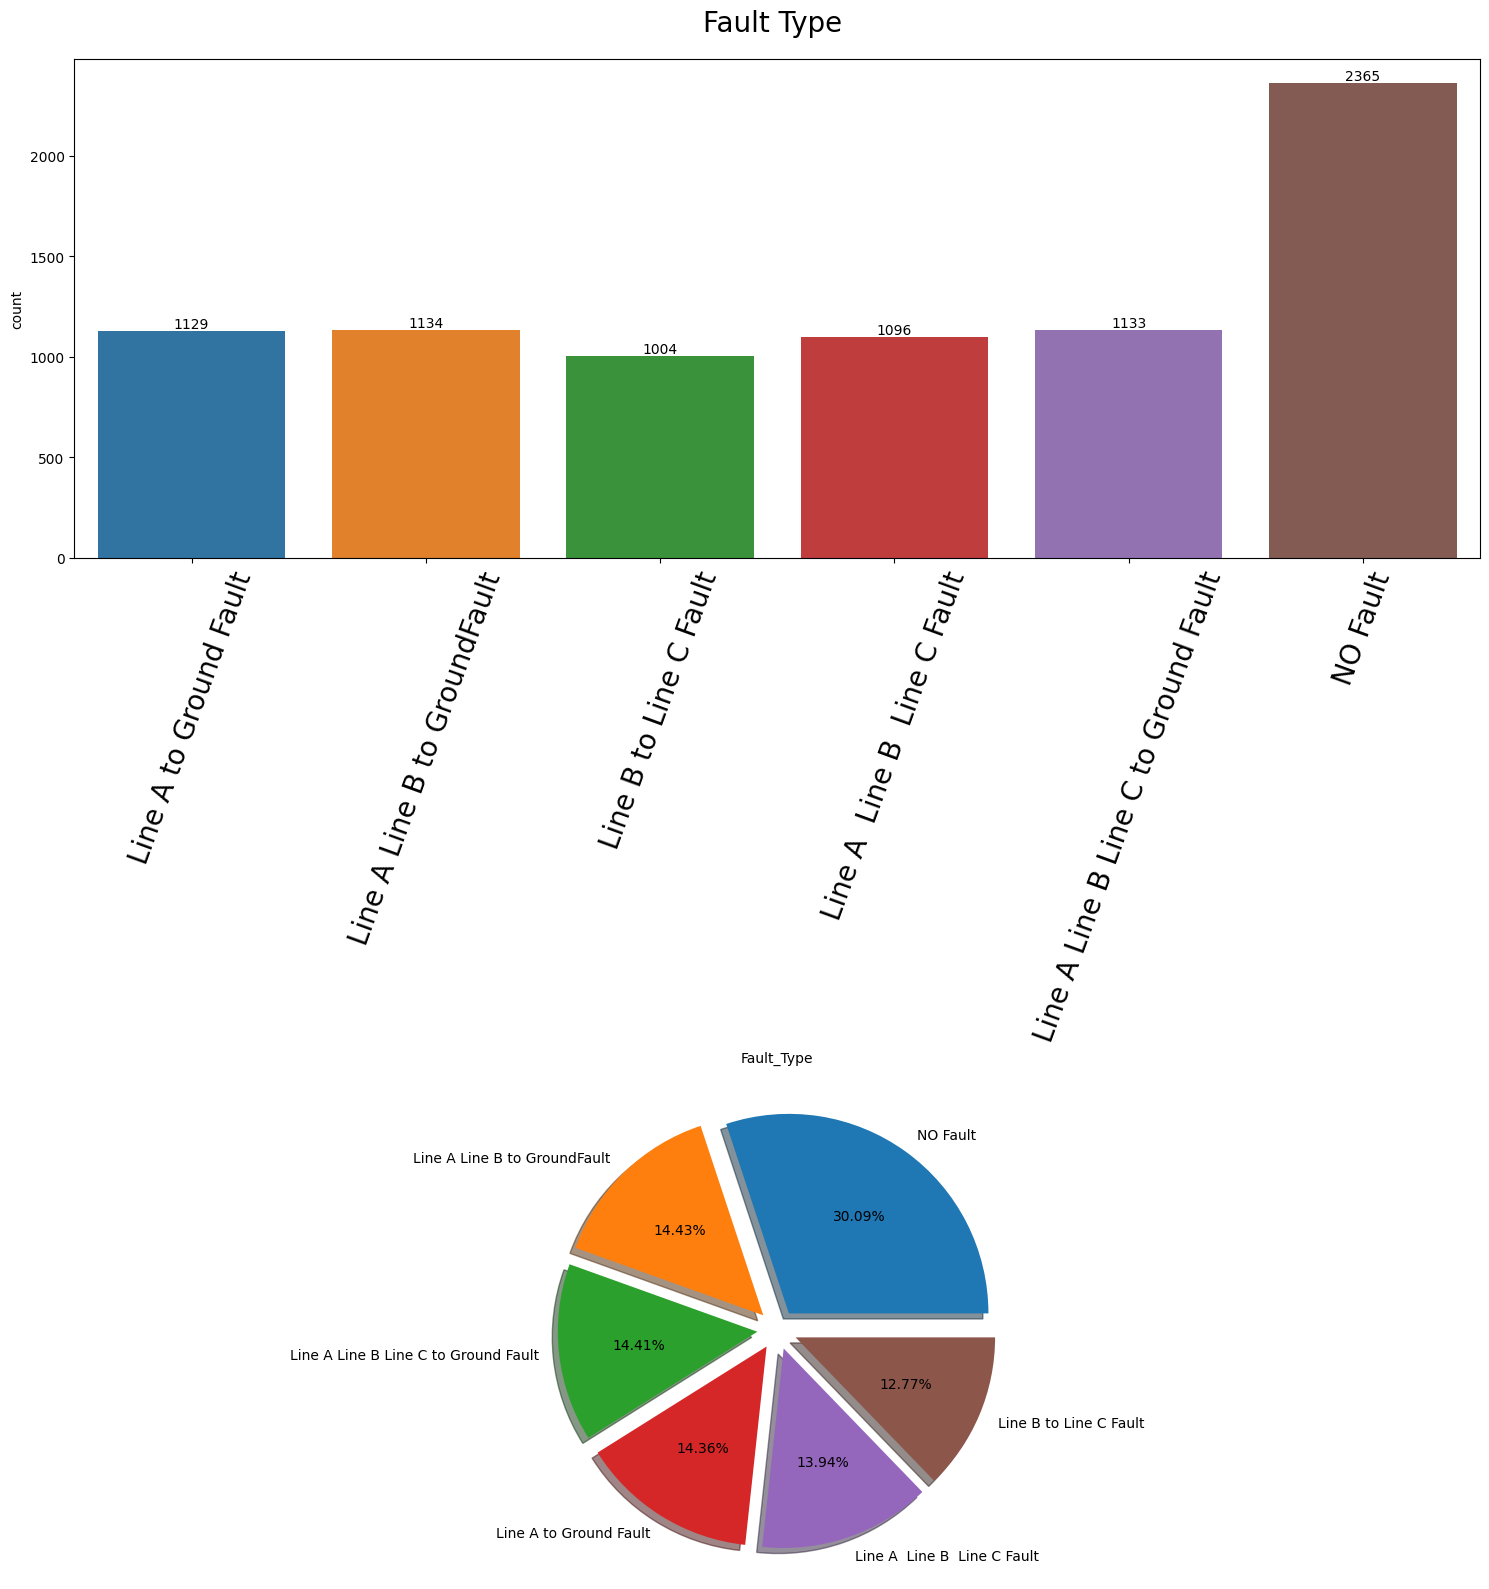

In [19]:
ax = plt.figure(figsize = (15,16))
ax = plt.subplot(2,1,1)
ax = sns.countplot(x = 'Fault_Type' , data = power_df)
ax.bar_label(ax.containers[0])
plt.title("Fault Type " , fontsize = 20 , pad =20)
plt.xticks(rotation =70 ,fontsize = 20)
plt.tight_layout()

ax = plt.subplot(2,1,2)
ax = power_df['Fault_Type'].value_counts().plot.pie(explode = [0.1,0.1,0.1,0.1, 0.1,0.1],
                                                     autopct = '%1.2f%%' ,shadow =True)
plt.tight_layout()
plt.axis('off');

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


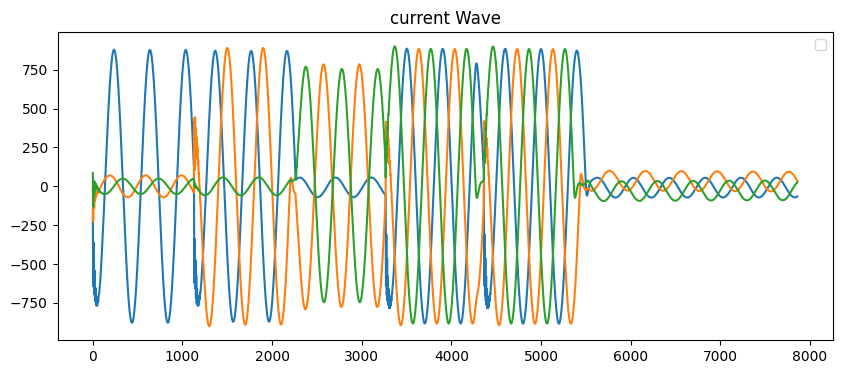

In [20]:
plt.figure(figsize=(10,4))
plt.plot(power_df["Ia"])
plt.plot(power_df["Ib"])
plt.plot(power_df["Ic"])
plt.title('current Wave')
plt.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


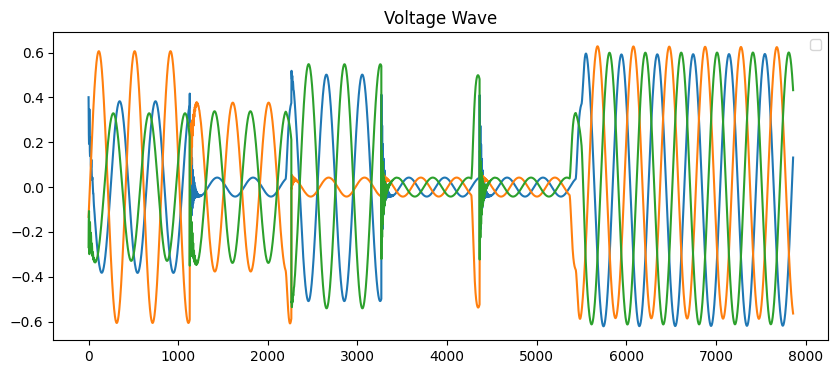

In [21]:
plt.figure(figsize=(10,4))
plt.plot(power_df["Va"])
plt.plot(power_df["Vb"])
plt.plot(power_df["Vc"])
plt.title('Voltage Wave')
plt.legend()

 Voltage or Current graph , where there is large fluctuations in the graph there faults have occured

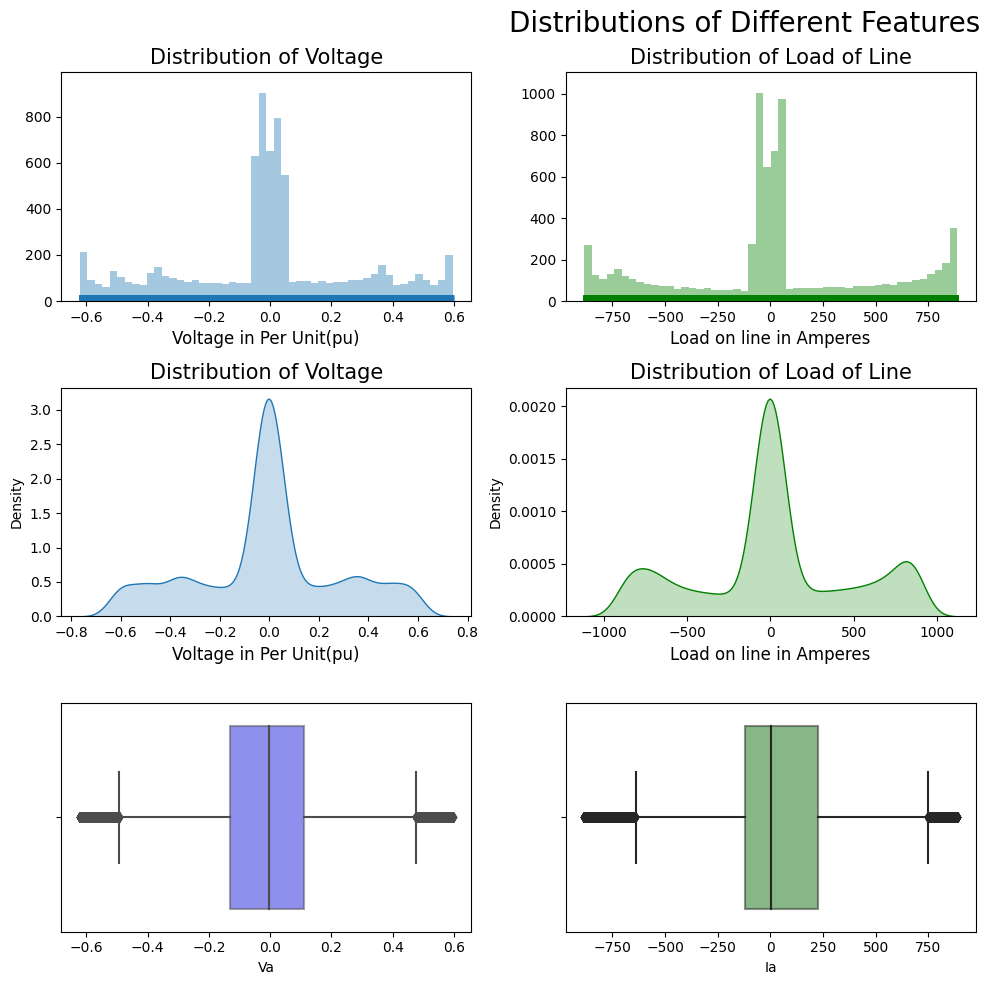

In [22]:
plt.figure(figsize= (15,10))
plt.suptitle("Distributions of Different Features", fontsize = 20)
#Histograms
plt.subplot(3,3,1)
sns.distplot(power_df['Va'], rug = True, kde = False)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,2)
sns.distplot(power_df['Ia'], color= 'green',rug = True, kde = False)
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Kde Plots
plt.subplot(3,3,4)
sns.kdeplot(power_df['Va'], shade = True)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,5)
sns.kdeplot(power_df['Ia'], shade = True, color = 'g')
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Box Plots
plt.subplot(3,3,7)
sns.boxplot(x = power_df['Va'], orient = 'v',color= 'b', boxprops=dict(alpha=.5))
plt.subplot(3,3,8)
sns.boxplot(x = power_df['Ia'], orient = 'v', color= 'g', boxprops=dict(alpha=.5))


plt.tight_layout()
plt.show()

Seperating fault into healthy  categories

### No fault 

In [23]:
No_fault = power_df[power_df['Fault_Type']=='NO Fault']
No_fault.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
5496,0,0,0,0,61.806321,-22.861987,21.102428,0.366320,-0.567179,0.200859,NO Fault
5497,0,0,0,0,48.041678,-23.401108,21.273066,0.367341,-0.564257,0.196916,NO Fault
5498,0,0,0,0,34.256533,-23.909263,21.408047,0.368258,-0.561168,0.192910,NO Fault
5499,0,0,0,0,20.464350,-24.396165,21.501503,0.369086,-0.557916,0.188830,NO Fault
5500,0,0,0,0,7.109677,-25.075888,21.341967,0.370321,-0.554505,0.184184,NO Fault


Text(0.5, 1.0, 'No_ fault  Current wave')

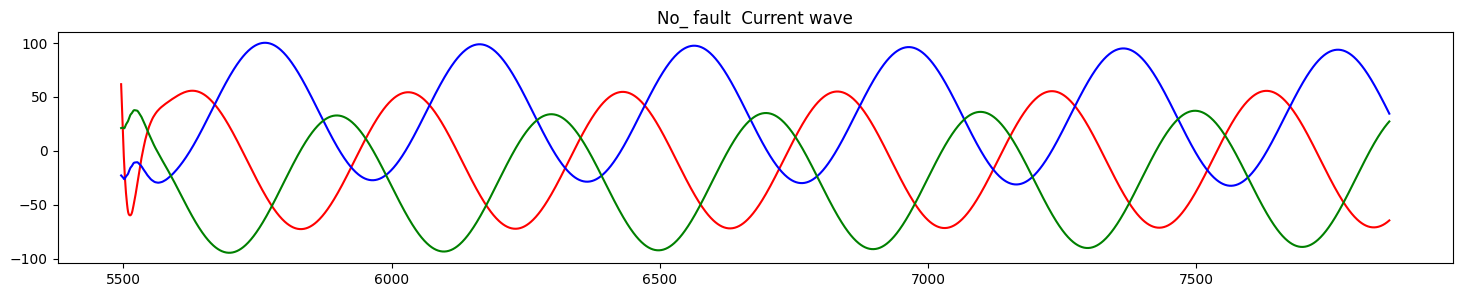

In [24]:
ax = plt.figure(figsize=(18,3))
ax = plt.plot(No_fault['Ia'] , 'r')
ax = plt.plot(No_fault["Ib"],'b')
ax = plt.plot(No_fault["Ic"],'g')
plt.title('No_ fault  Current wave')



Text(0.5, 1.0, 'No_ fault  Voltage wave')

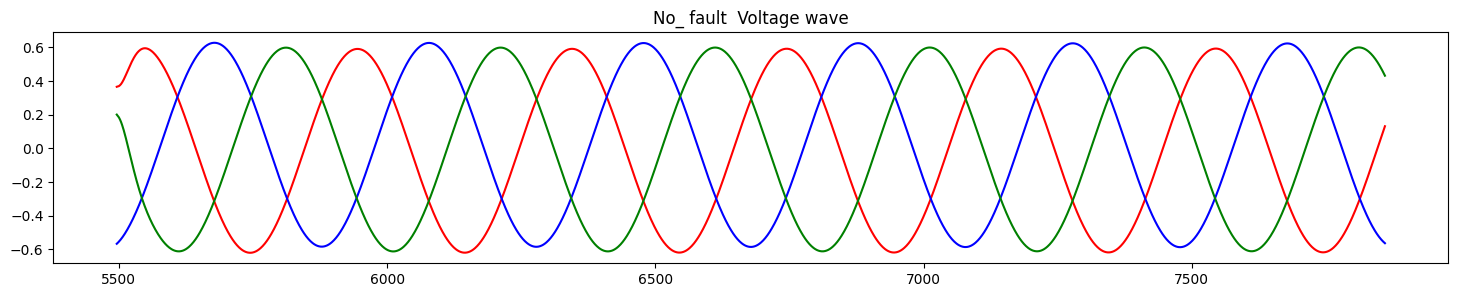

In [25]:
ax = plt.figure(figsize=(18,3))
ax = plt.plot(No_fault['Va'] , 'r')
ax = plt.plot(No_fault["Vb"],'b')
ax = plt.plot(No_fault["Vc"],'g')
plt.title('No_ fault  Voltage wave')

In a normal (No_Fault) condition Voltage or Current graph, is symmetrical and sinusoidal in nature with current and voltage 120 degree in phase shift and maximum current is approximately +100 to -100 Amperes and voltage +0.5 pu to -0.5pu

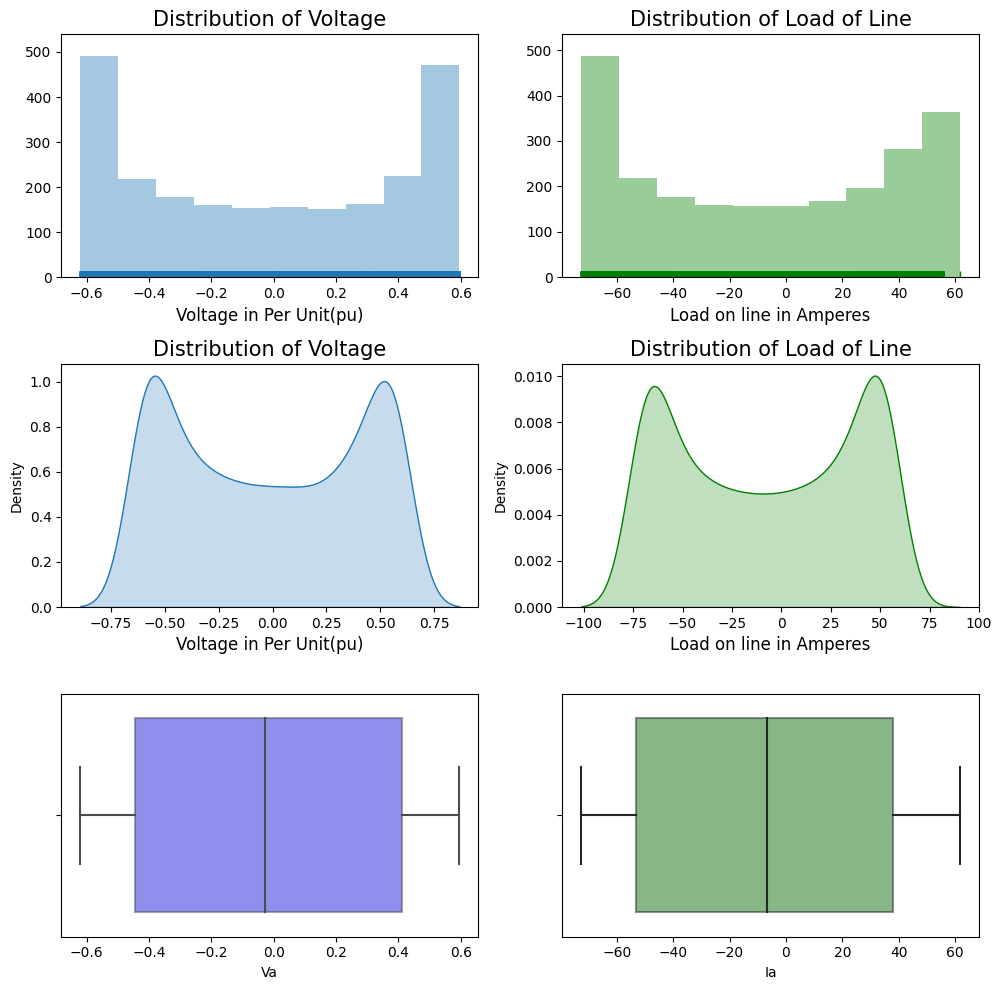

In [26]:
plt.figure(figsize= (15,10))
#plt.suptitle("Distributions of Different Features", fontsize = 20)
#Histograms
plt.subplot(3,3,1)
sns.distplot(No_fault['Va'], rug = True, kde = False)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,2)
sns.distplot(No_fault['Ia'], color= 'green',rug = True, kde = False)
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Kde Plots
plt.subplot(3,3,4)
sns.kdeplot(No_fault['Va'], shade = True)
plt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
plt.title('Distribution of Voltage',fontsize = 15)

plt.subplot(3,3,5)
sns.kdeplot(No_fault['Ia'], shade = True, color = 'g')
plt.title('Distribution of Load of Line',fontsize = 15)
plt.xlabel('Load on line in Amperes', fontsize = 12)


#Box Plots
plt.subplot(3,3,7)
sns.boxplot(x = No_fault['Va'], orient = 'v',color= 'b', boxprops=dict(alpha=.5))
plt.subplot(3,3,8)
sns.boxplot(x = No_fault['Ia'], orient = 'v', color= 'g', boxprops=dict(alpha=.5))


plt.tight_layout()
plt.show()

#### Fault sytem with Line A to ground fault

In [27]:
Line_AG_Fault = power_df[power_df['Fault_Type']=='Line A to Ground Fault' ]
Line_AG_Fault.head()


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault


Text(0.5, 1.0, 'line A to ground fault in current wave')

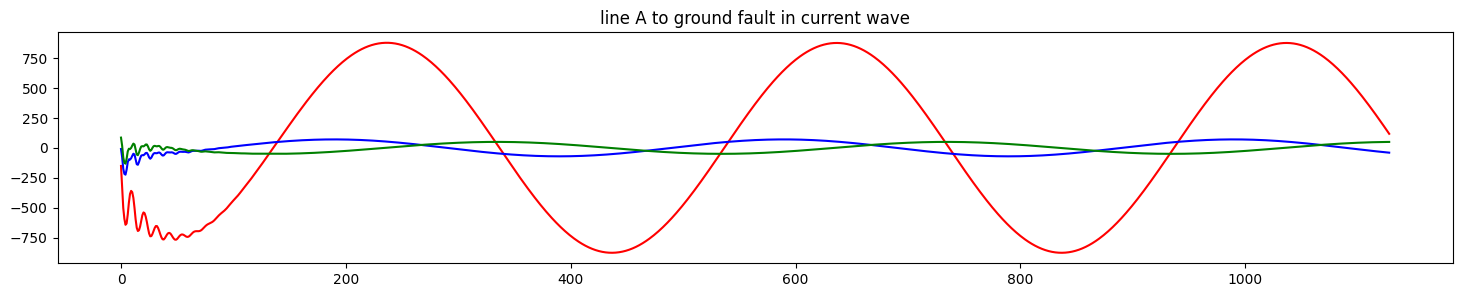

In [28]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_AG_Fault["Ia"],'r')
ax = plt.plot(Line_AG_Fault["Ib"],'b')
ax = plt.plot(Line_AG_Fault["Ic"],'g')
plt.title("line A to ground fault in current wave")

Text(0.5, 1.0, 'line A to ground fault in Votlage wave')

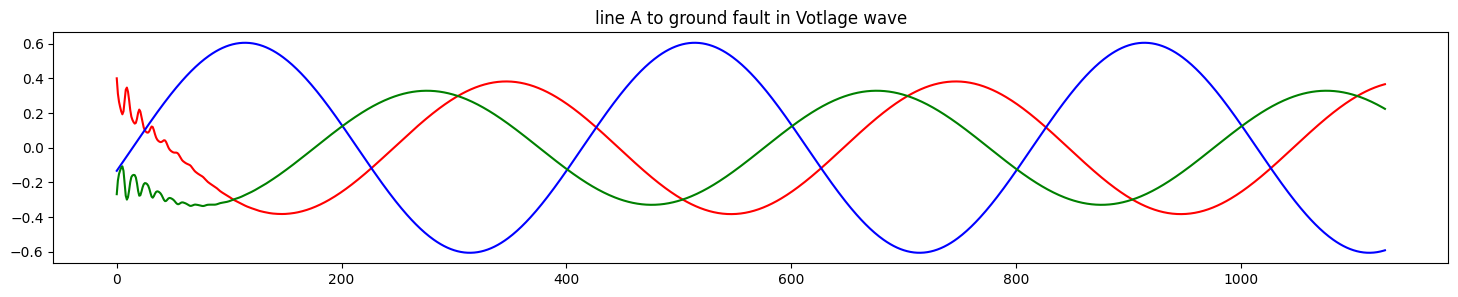

In [29]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_AG_Fault["Va"],'r')
ax = plt.plot(Line_AG_Fault["Vb"],'b')
ax = plt.plot(Line_AG_Fault["Vc"],'g')
plt.title("line A to ground fault in Votlage wave")

Note: At a time of Line A to grounf fault the current in line A increases to 10 fold approximately 1000 Ampears form normal 100 Ampears and voltage reduced.

Faulty System with Line A ,Line B to Ground Fault

In [30]:
Line_ABG_Fault = power_df[power_df['Fault_Type'] == 'Line A Line B Line C to Ground Fault' ]
Line_ABG_Fault.head(5)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
4363,1,1,1,1,-99.252463,52.717974,48.341534,0.410059,-0.086914,-0.323145,Line A Line B Line C to Ground Fault
4364,1,1,1,1,-342.238819,224.821345,119.149604,0.095347,-0.002326,-0.093021,Line A Line B Line C to Ground Fault
4365,1,1,1,1,-526.874012,351.614759,176.674369,-0.130437,0.055441,0.074996,Line A Line B Line C to Ground Fault
4366,1,1,1,1,-633.768916,420.246089,214.577137,-0.244709,0.082066,0.162643,Line A Line B Line C to Ground Fault
4367,1,1,1,1,-639.566896,415.329565,225.117414,-0.223359,0.073192,0.150167,Line A Line B Line C to Ground Fault


Text(0.5, 1.0, 'Line A ,Line B to Ground Fault ,Current Wave')

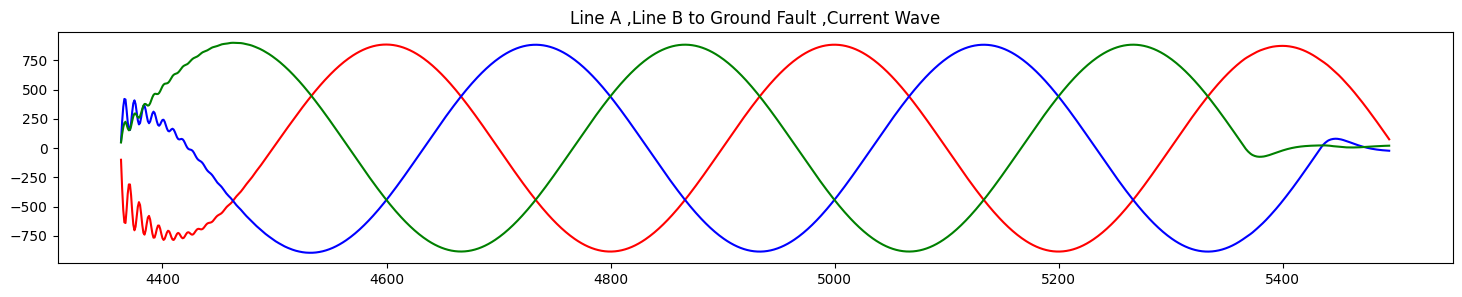

In [31]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABG_Fault["Ia"],'r')
ax = plt.plot(Line_ABG_Fault["Ib"],'b')
ax = plt.plot(Line_ABG_Fault["Ic"],'g')
plt.title('Line A ,Line B to Ground Fault ,Current Wave')

Text(0.5, 1.0, 'Line A ,Line B to Ground Fault ,Voltage Wave')

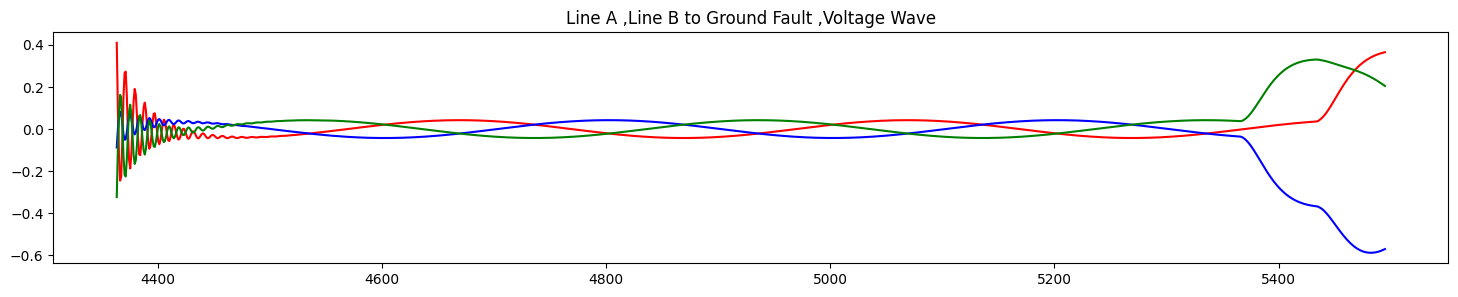

In [32]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABG_Fault["Va"],'r')
ax = plt.plot(Line_ABG_Fault["Vb"],'b')
ax = plt.plot(Line_ABG_Fault["Vc"],'g')
plt.title('Line A ,Line B to Ground Fault ,Voltage Wave')


Faulty System with Line B to Line C

In [33]:
Line_BC_Fault = power_df[power_df['Fault_Type'] == 'Line B to Line C Fault' ]
Line_BC_Fault.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
2263,0,1,1,0,41.764455,-93.940215,55.022192,0.517510,-0.003685,-0.513825,Line B to Line C Fault
2264,0,1,1,0,42.394348,-105.038998,65.494029,0.518491,-0.008071,-0.510420,Line B to Line C Fault
2265,0,1,1,0,43.010571,-105.734383,65.569977,0.511217,0.003798,-0.515015,Line B to Line C Fault
2266,0,1,1,0,43.612456,-100.121739,59.347319,0.499096,0.025105,-0.524201,Line B to Line C Fault
2267,0,1,1,0,44.202230,-95.078643,53.707382,0.487527,0.045052,-0.532579,Line B to Line C Fault


Text(0.5, 1.0, 'Line B, to line C Fault ,Current Wave')

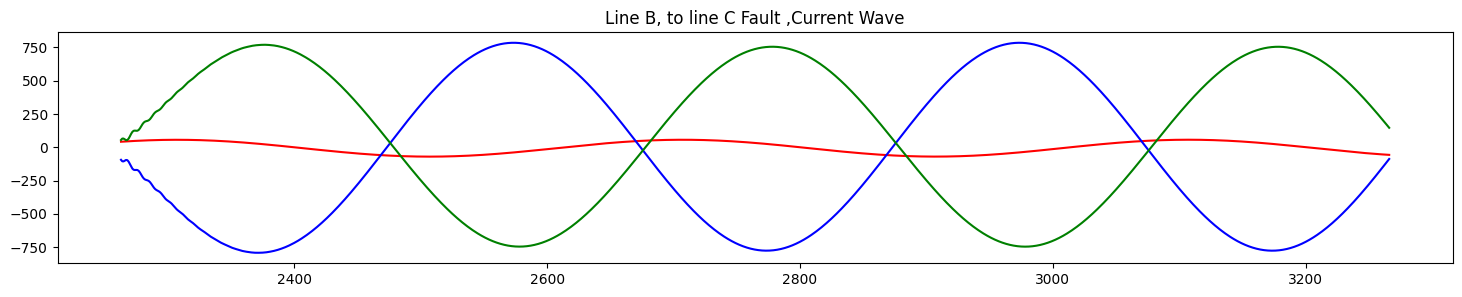

In [34]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_BC_Fault["Ia"],'r')
ax = plt.plot(Line_BC_Fault["Ib"],'b')
ax = plt.plot(Line_BC_Fault["Ic"],'g')
plt.title('Line B, to line C Fault ,Current Wave')

Text(0.5, 1.0, 'Line B, to line C Fault ,Current Wave')

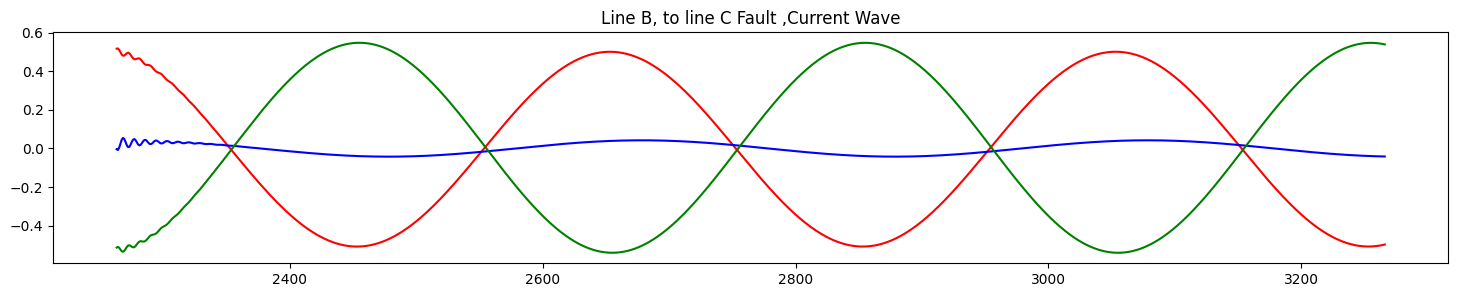

In [35]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_BC_Fault["Va"],'r')
ax = plt.plot(Line_BC_Fault["Vb"],'b')
ax = plt.plot(Line_BC_Fault["Vc"],'g')
plt.title('Line B, to line C Fault ,Current Wave')

 Faulty System with Line A - Line B - Line C

In [36]:
Line_ABC_Fault = power_df[power_df['Fault_Type'] == 'Line A  Line B  Line C Fault' ]
Line_ABC_Fault.head(5)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
3267,0,1,1,1,-99.274309,44.146905,57.318650,0.412305,-0.091525,-0.320781,Line A Line B Line C Fault
3268,0,1,1,1,-342.196277,218.566556,125.820753,0.095905,-0.003471,-0.092434,Line A Line B Line C Fault
3269,0,1,1,1,-526.696029,347.197345,181.689494,-0.131094,0.056790,0.074304,Line A Line B Line C Fault
3270,0,1,1,1,-633.453623,416.942091,218.702118,-0.245984,0.084683,0.161301,Line A Line B Line C Fault
3271,0,1,1,1,-639.192926,412.122656,229.260639,-0.224523,0.075580,0.148943,Line A Line B Line C Fault


Text(0.5, 1.0, 'Line A, Line B  to Line C Fault Current Wave ')

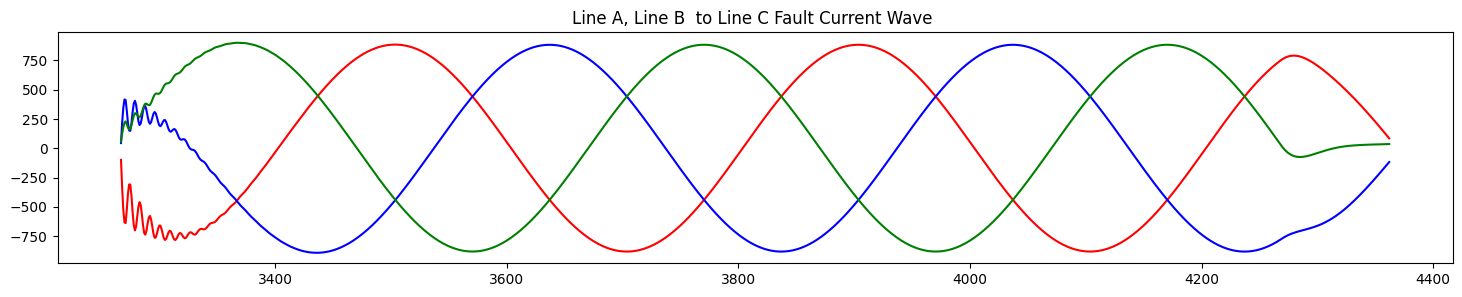

In [37]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABC_Fault["Ia"],'r')
ax = plt.plot(Line_ABC_Fault["Ib"],'b')
ax = plt.plot(Line_ABC_Fault["Ic"],'g')
plt.title('Line A, Line B  to Line C Fault Current Wave ')

Text(0.5, 1.0, 'Line A, Line B  to Line C Fault Voltage Wave ')

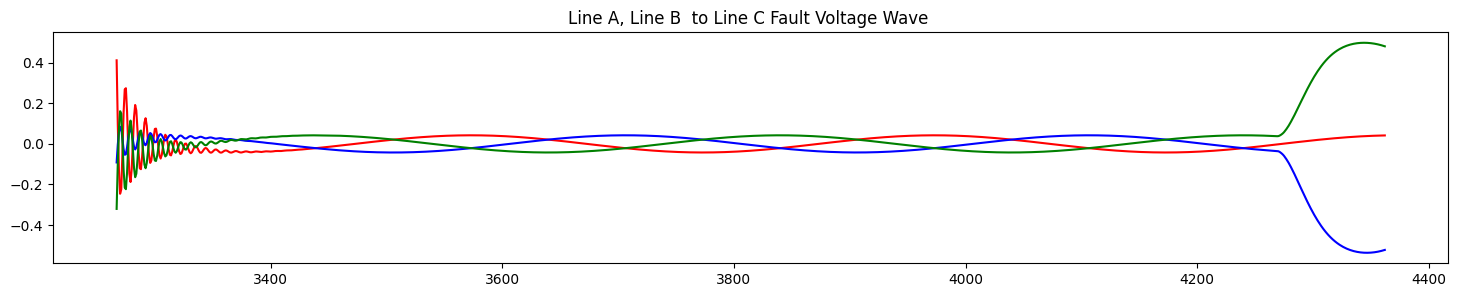

In [38]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABC_Fault["Va"],'r')
ax = plt.plot(Line_ABC_Fault["Vb"],'b')
ax = plt.plot(Line_ABC_Fault["Vc"],'g')
plt.title('Line A, Line B  to Line C Fault Voltage Wave ')

Faulty System with Line A - Line B - Line C - Ground

In [39]:
Line_ABCG_Fault = power_df[power_df['Fault_Type'] == 'Line A Line B Line C to Ground Fault']
Line_ABCG_Fault.head()


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
4363,1,1,1,1,-99.252463,52.717974,48.341534,0.410059,-0.086914,-0.323145,Line A Line B Line C to Ground Fault
4364,1,1,1,1,-342.238819,224.821345,119.149604,0.095347,-0.002326,-0.093021,Line A Line B Line C to Ground Fault
4365,1,1,1,1,-526.874012,351.614759,176.674369,-0.130437,0.055441,0.074996,Line A Line B Line C to Ground Fault
4366,1,1,1,1,-633.768916,420.246089,214.577137,-0.244709,0.082066,0.162643,Line A Line B Line C to Ground Fault
4367,1,1,1,1,-639.566896,415.329565,225.117414,-0.223359,0.073192,0.150167,Line A Line B Line C to Ground Fault


Text(0.5, 1.0, 'Line A Line B Line C to Ground Fault Current Wave')

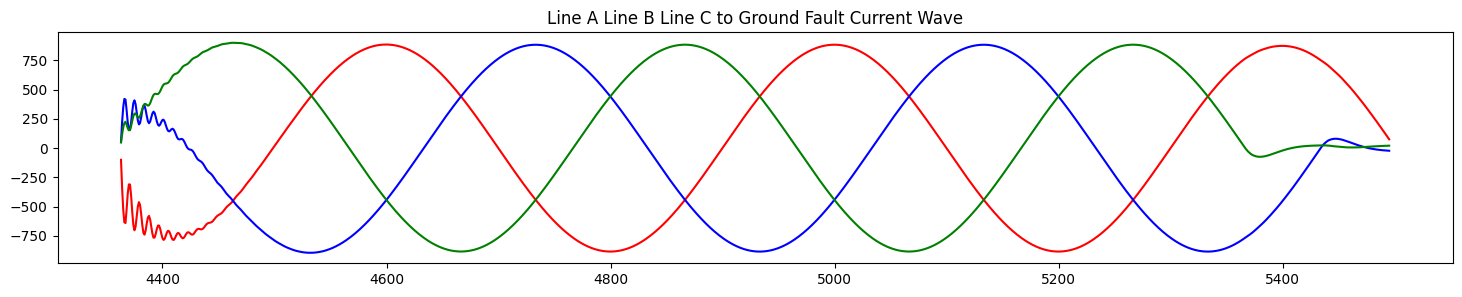

In [40]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABCG_Fault["Ia"],'r')
ax = plt.plot(Line_ABCG_Fault["Ib"],'b')
ax = plt.plot(Line_ABCG_Fault["Ic"],'g')
plt.title("Line A Line B Line C to Ground Fault Current Wave")

Text(0.5, 1.0, 'Line A Line B Line C to Ground Fault Voltage Wave')

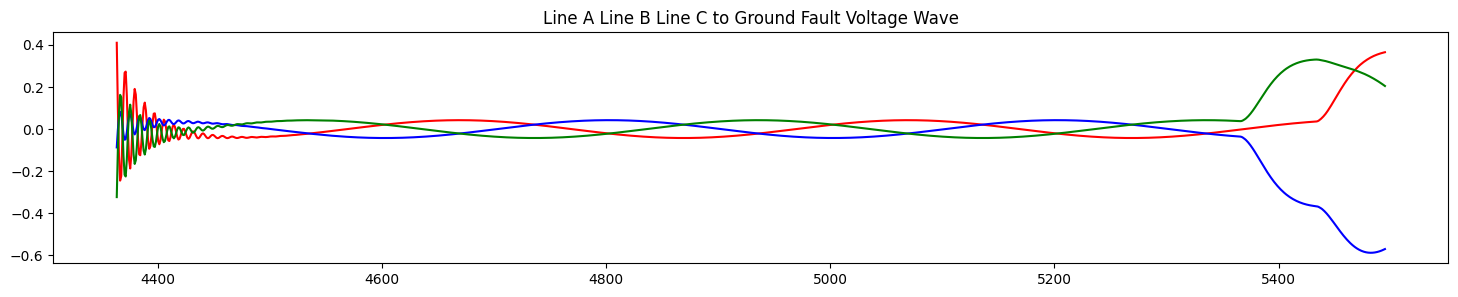

In [41]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(Line_ABCG_Fault["Va"],'r')
ax = plt.plot(Line_ABCG_Fault["Vb"],'b')
ax = plt.plot(Line_ABCG_Fault["Vc"],'g')
plt.title("Line A Line B Line C to Ground Fault Voltage Wave")

In [42]:
print(power_df['Fault_Type'].unique())

['Line A to Ground Fault' 'Line A Line B to GroundFault'
 'Line B to Line C Fault' 'Line A  Line B  Line C Fault'
 'Line A Line B Line C to Ground Fault' 'NO Fault']


###  Categorical to Numerical conversion

In [43]:
from  sklearn.preprocessing import LabelEncoder
encoder =LabelEncoder()
power_df['Fault_Type'] = encoder.fit_transform(power_df['Fault_Type'])

power_df.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3


#### Features and Target sepration

In [44]:
power_df['Fault_Type'] = power_df['Fault_Type'].values.reshape(-1)
X = power_df.drop(['Fault_Type'], axis =1)
y = power_df['Fault_Type']
print(X.shape[1])
print(y.shape[0])


10
7861


In [45]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state =21)



### logistic regression

Training Accuracy    : 90.11 %
Model Accuracy Score : 89.57 %
-------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.56      1.00      0.72       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      0.17      0.29       198
           5       1.00      1.00      1.00       456

    accuracy                           0.90      1573
   macro avg       0.93      0.86      0.84      1573
weighted avg       0.94      0.90      0.87      1573

-------------------------------------------------------


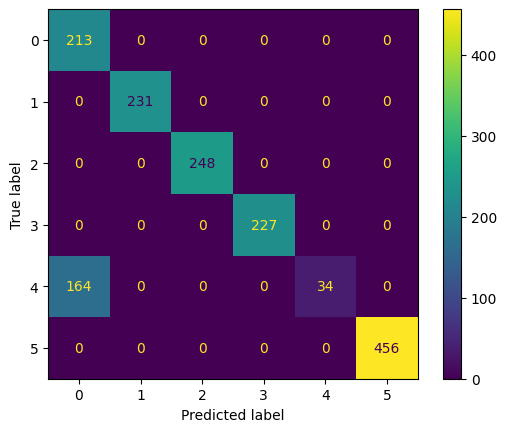

In [46]:
from sklearn.metrics import accuracy_score ,classification_report,confusion_matrix,ConfusionMatrixDisplay

# Logistic regression 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train ,y_train)*100 ,2)
log_accuracy = round(accuracy_score(y_pred_lr ,y_test)*100 ,2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("-------------------------------------------------------")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("-------------------------------------------------------")

cm = confusion_matrix(y_test, y_pred_lr, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=logreg.classes_)
disp.plot()
plt.show()



#### Decision Tree Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
-------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

-------------------------------------------------------


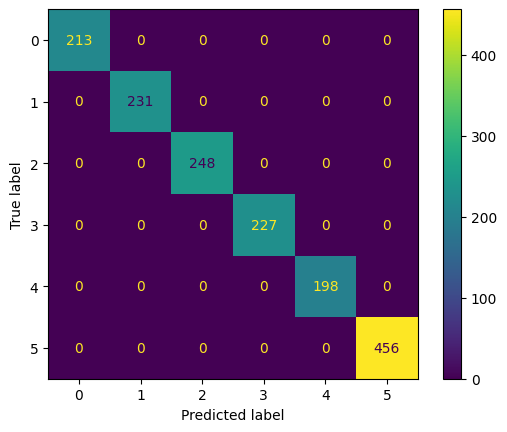

In [47]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision =DecisionTreeClassifier()
decision.fit(X_train ,y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("-------------------------------------------------------")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("-------------------------------------------------------")

dt_cm = confusion_matrix(y_test, y_pred_dec, labels=decision.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm,
                             display_labels=decision.classes_)
disp.plot()
plt.show()

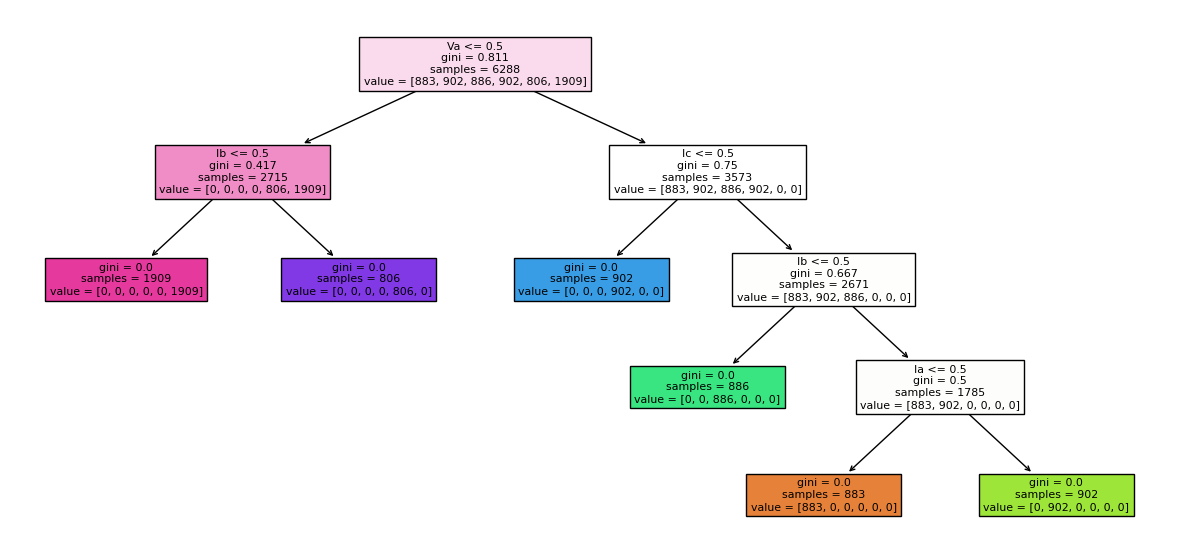

In [48]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7))
plot_tree(decision,filled=True,feature_names=['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'])
plt.show()

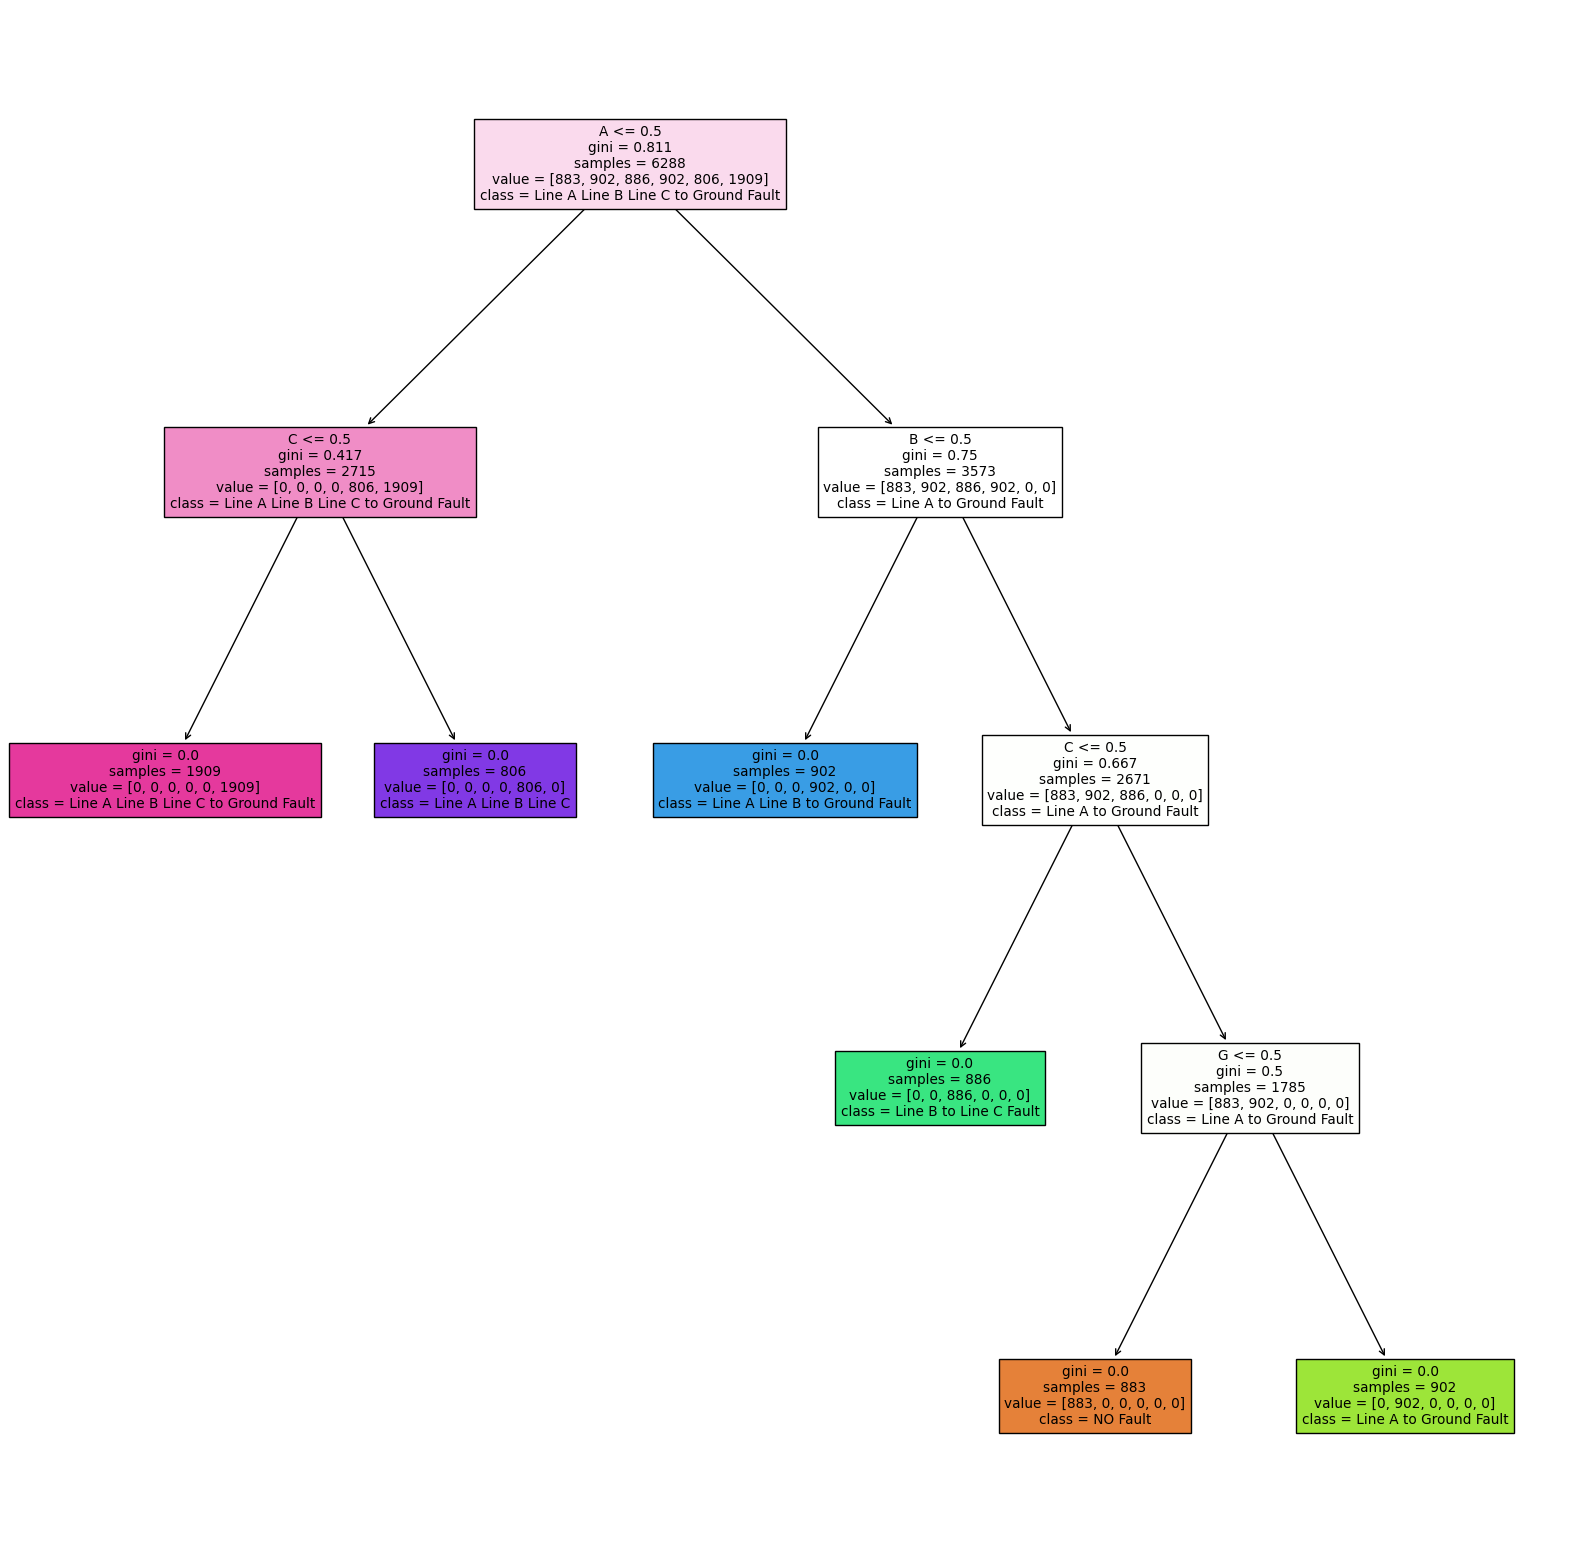

In [49]:
from sklearn import tree
def tree_plot(model_name):
    plt.figure(figsize=(20,20))
    features = power_df.columns
    classes = ['NO Fault','Line A to Ground Fault','Line B to Line C Fault','Line A Line B to Ground Fault','Line A Line B Line C','Line A Line B Line C to Ground Fault']
    tree.plot_tree(model_name,feature_names=features,class_names=classes,filled=True)
    plt.show()
tree_plot(decision)


### Random Forest Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
-------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

-------------------------------------------------------


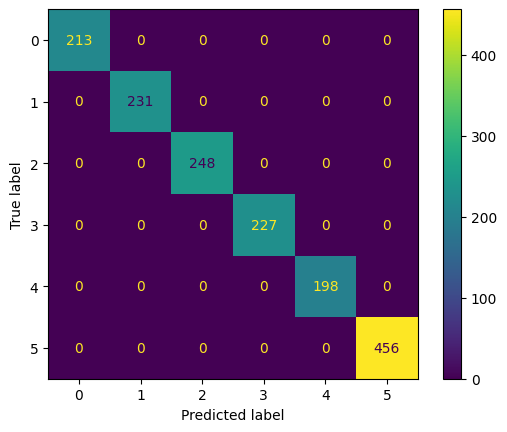

In [50]:
# Decision Tree
from sklearn.ensemble import RandomForestClassifier
randome_forest =RandomForestClassifier()
randome_forest.fit(X_train ,y_train)
y_pred_rf = randome_forest.predict(X_test)

rf_train = round(decision.score(X_train, y_train) * 100, 2)
rf_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",rf_train ,"%")
print("Model Accuracy Score :",rf_accuracy ,"%")
print("-------------------------------------------------------")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("-------------------------------------------------------")

dt_cm = confusion_matrix(y_test, y_pred_rf, labels=randome_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm,
                             display_labels=randome_forest.classes_)
disp.plot()
plt.show()

#### XGB Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
-------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      1.00      1.00       198
           5       1.00      1.00      1.00       456

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

-------------------------------------------------------


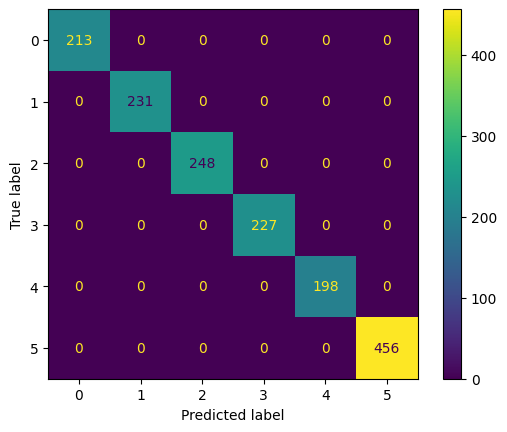

In [51]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(decision.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy    :",xgb_train ,"%")
print("Model Accuracy Score :",xgb_accuracy ,"%")
print("-------------------------------------------------------")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))
print("-------------------------------------------------------")

xgb_cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=xgb_cm,
                             display_labels=xgb.classes_)
disp.plot()
plt.show()

### SVM (support vector machines)


Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
-------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.48      0.35      0.40       213
           1       0.43      0.29      0.35       231
           2       0.75      0.83      0.78       248
           3       0.77      0.86      0.81       227
           4       0.79      0.86      0.82       198
           5       0.87      1.00      0.93       456

    accuracy                           0.74      1573
   macro avg       0.68      0.70      0.68      1573
weighted avg       0.71      0.74      0.72      1573

-------------------------------------------------------


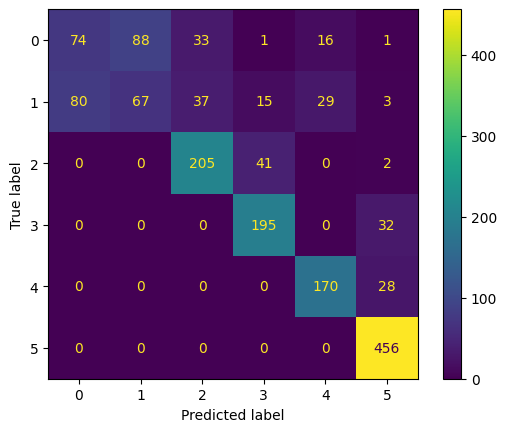

In [52]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
svc.score(X_train, y_train)

svc_train = round(decision.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("-------------------------------------------------------")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("-------------------------------------------------------")

svc_cm = confusion_matrix(y_test, y_pred_svc, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=svc_cm,
                             display_labels=svc.classes_)
disp.plot()
plt.show()

 #### -------Comparing Different Models----------

In [53]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree', 'XGBClassifier'
    ],
    
    'Training Accuracy':
    [log_train, svc_train, decision_train, rf_train, xgb_train],
    
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, rf_accuracy,
        xgb_accuracy
    ]
})

In [54]:

pd.set_option("display.max_columns", 100)
models.sort_values(by='Model Accuracy Score', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
1,Logistic Regression,100.00,100.00
2,Random Forest,100.00,100.00
3,Decision Tree,100.00,100.00
4,XGBClassifier,100.00,100.00
0,Support Vector Machines,90.11,89.57


### Result prediction

In [55]:
print("Random Forest Classifier")
prediction1 = randome_forest.predict(X_test)
print(prediction1)
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
print(cross_checking.head(5))



print('================================================================')

print("logistic regression")
prediction2 = logreg.predict(X_test)
print(prediction2)
cross_checking2 = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction2})
print(cross_checking2.head(5))


print('================================================================')

print("Decision tree")
prediction3 = decision.predict(X_test)
print(prediction3)
cross_checking3 = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction3})
print(cross_checking3.head(5))


print('================================================================')

print("XGB Classifier")
prediction4 = xgb.predict(X_test)
print(prediction4)
cross_checking4 = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction4})
print(cross_checking4.head(5))

print('================================================================')

print("SVC Classifier")
prediction5 = svc.predict(X_test)
print(prediction5)
cross_checking5 = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction5})
print(cross_checking5.head(5))

print('================================================================')


Random Forest Classifier
[1 0 0 ... 0 0 5]
      Actual  Predicted
4530       1          1
3669       0          0
3902       0          0
6000       5          5
5053       1          1
logistic regression
[1 0 0 ... 0 0 5]
      Actual  Predicted
4530       1          1
3669       0          0
3902       0          0
6000       5          5
5053       1          1
Decision tree
[1 0 0 ... 0 0 5]
      Actual  Predicted
4530       1          1
3669       0          0
3902       0          0
6000       5          5
5053       1          1
XGB Classifier
[1 0 0 ... 0 0 5]
      Actual  Predicted
4530       1          1
3669       0          0
3902       0          0
6000       5          5
5053       1          1
SVC Classifier
[0 2 1 ... 0 2 5]
      Actual  Predicted
4530       1          0
3669       0          2
3902       0          1
6000       5          5
5053       1          0
